In [65]:
import pandas as pd
from sqlalchemy import create_engine

file_path = r"C:\Users\RT\OneDrive\Documents\Datasets\laptopData.csv"
df = pd.read_csv(file_path)


In [11]:
# Get summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display data types of each column
print(df.dtypes)


                 S/N          Price
count    1273.000000    1273.000000
mean   100637.000000   59955.814073
std       367.627756   37332.251005
min    100001.000000    9270.720000
25%    100319.000000   31914.720000
50%    100637.000000   52161.120000
75%    100955.000000   79333.387200
max    101273.000000  324954.720000
S/N                 0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64
S/N                   int64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object


In [15]:
#AVERAGE PRICE BY COMPANY

avg_price_by_company = df.groupby('Company')['Price'].mean()
print(avg_price_by_company)

Company
Acer          33394.615969
Apple         83340.499886
Asus          58972.373723
Chuwi         16745.726400
Dell          63237.061079
Fujitsu       38574.720000
Google        89386.080000
HP            57214.371465
Huawei        75870.720000
LG           111834.720000
Lenovo        58072.477208
MSI           91814.548891
Mediacom      15717.600000
Microsoft     85903.788000
Razer        178282.491429
Samsung       75308.320000
Toshiba       66747.370213
Vero          11584.404000
Xiaomi        60390.882000
Name: Price, dtype: float64


In [17]:
# MOST COMMON SCREEN RESOLUTIONS

common_resolutions = df['ScreenResolution'].value_counts().head(10)
print(common_resolutions)


ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
Name: count, dtype: int64


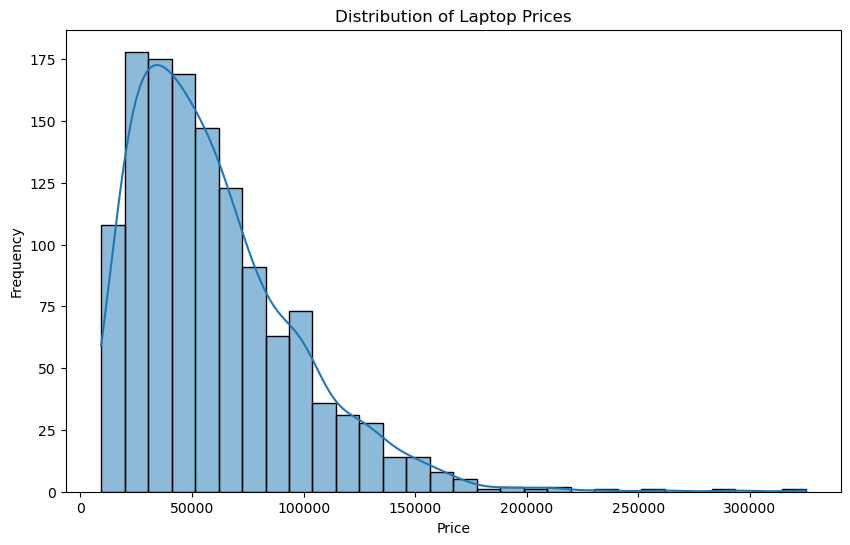

In [19]:
# DISTRIBUTION BY LAPTOP PRICES

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


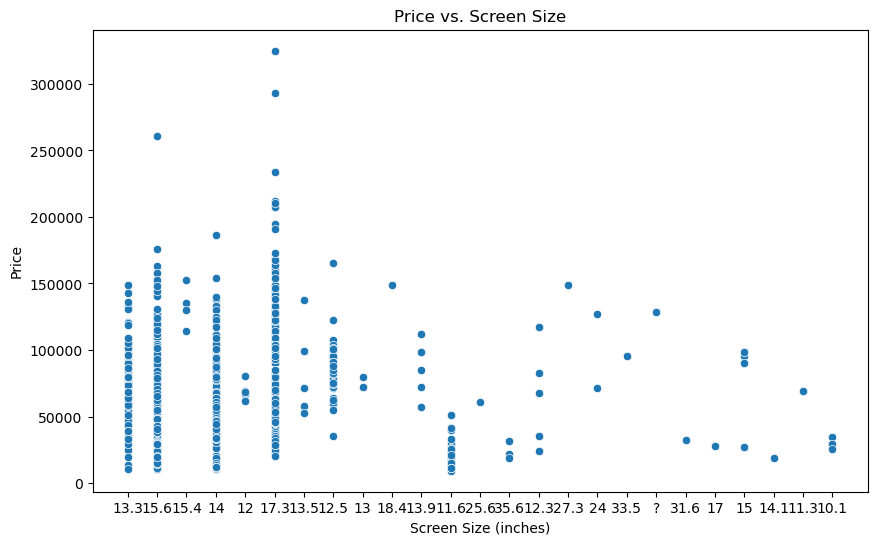

In [23]:
# PRICE VS SCREEN SIZE

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Price', data=df)
plt.title('Price vs. Screen Size')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price')
plt.show()


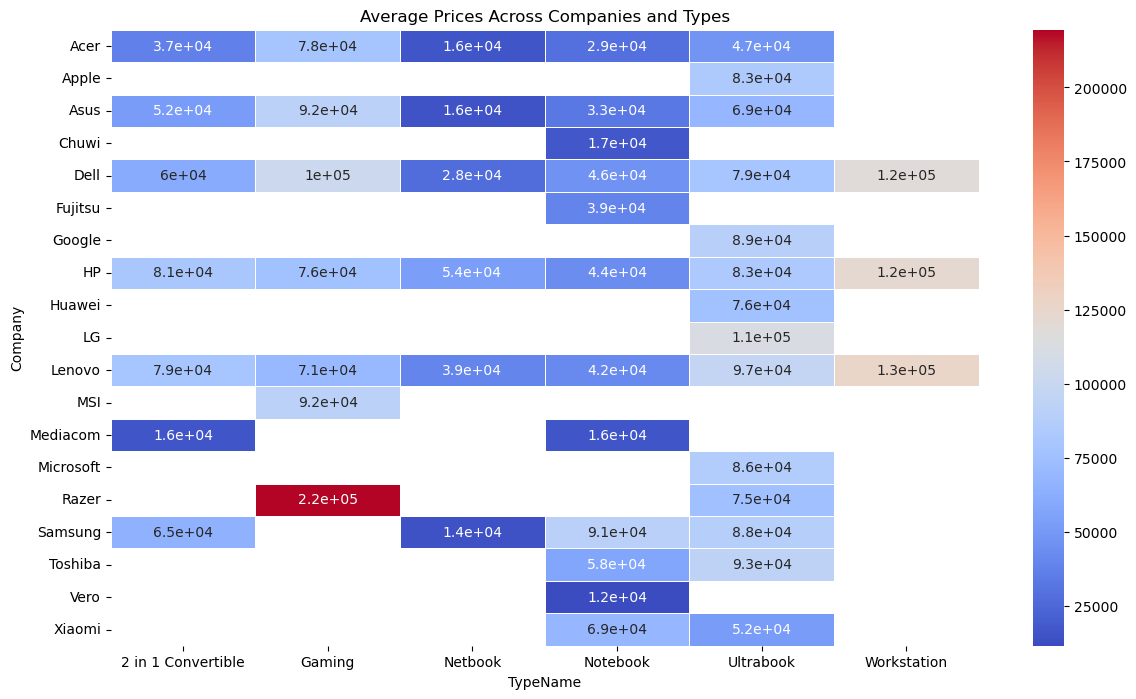

In [39]:
# DISTRIBUTION OF PRICES ACROSS DIFFERENT COMPANIES AND TYPES 

pivot_table = df.pivot_table(index='Company', columns='TypeName', values='Price', aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Average Prices Across Companies and Types')
plt.show()

C:\Users\RT\AppData\Local\Temp\ipykernel_19484\367534960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TypeName', y='Price', data=df, palette='viridis')


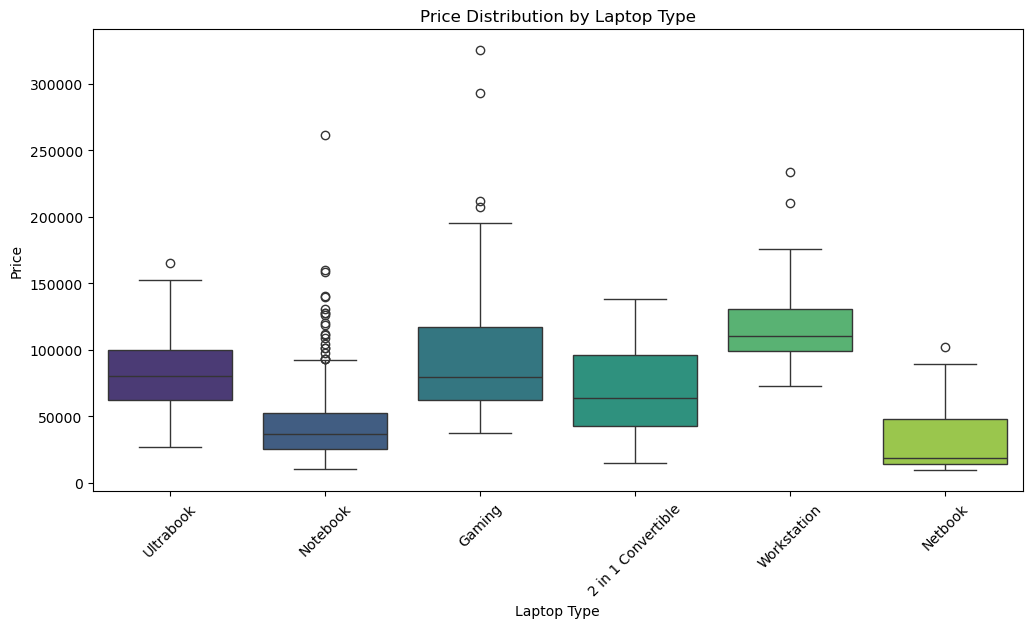

In [41]:
# PRICE DISTRIBUTION BY LAPTOP TYPE

plt.figure(figsize=(12, 6))
sns.boxplot(x='TypeName', y='Price', data=df, palette='viridis')
plt.title('Price Distribution by Laptop Type')
plt.xlabel('Laptop Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\RT\AppData\Local\Temp\ipykernel_19484\3066880442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gpu_counts.index, y=gpu_counts.values, palette='viridis')


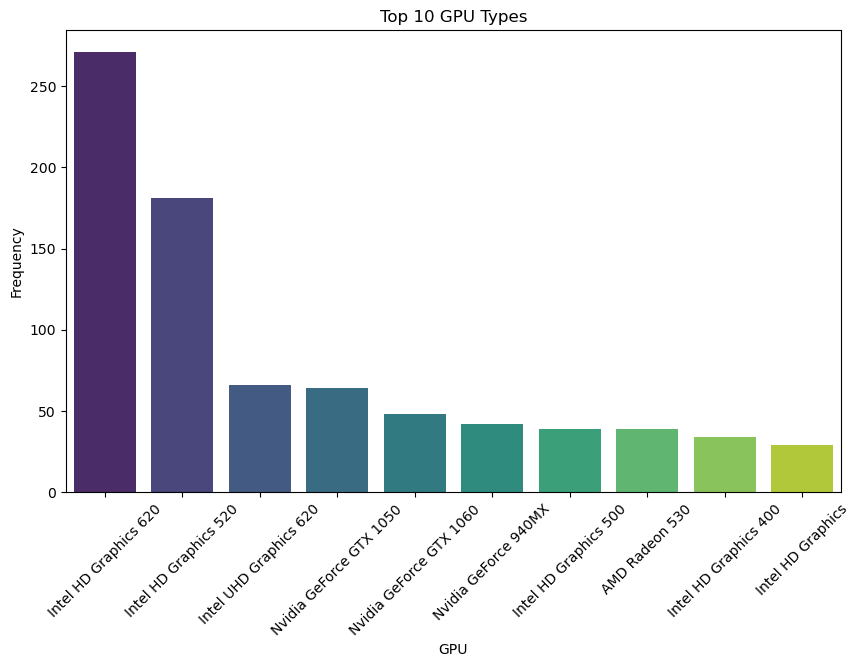

In [53]:
# GPU FREQUENCY

gpu_counts = df['Gpu'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=gpu_counts.index, y=gpu_counts.values, palette='viridis')
plt.title('Top 10 GPU Types')
plt.xlabel('GPU')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()